# Corners Detection : Holes Counting Algorithm in a Binary Image

In [88]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
my_img = mpimg.imread("data/tc.jpg")

## Convert Image to Binary Image

In [89]:
def get_distance(pixel,w=[1/3,1/3,1/3]):
    r,g,b = pixel[0],pixel[1],pixel[2]
    w0,w1,w2=w[0],w[1],w[2]
    return ((r**2)*w0+(g**2)*w1+(b**2)*w2)**0.5

#### Convert RGB Images into Grayscale using the weighted method ####
def convert_RGB2GRAY(img,weights):
    m=img.shape[0]
    n=img.shape[1]
    gray_img = np.zeros((m,n),dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            gray_img[i,j]=get_distance(img[i,j,:],weights)
    return gray_img

#### Convert A Grayscale Image into Black White Image ####
def convert_GRAY2BW(grayimg,threshold):
    m=grayimg.shape[0]
    n=grayimg.shape[1]
    img_bw = np.empty((m,n),dtype=np.uint8)
    for i in range(m):
        for j in range(n):
            if grayimg[i,j] > threshold:
                img_bw[i,j]=1
            else:
                img_bw[i,j]=0
    return img_bw

In [90]:
gray_scale = convert_RGB2GRAY(my_img,[.6,.3,.1])
bw_img = convert_GRAY2BW(gray_scale,120)

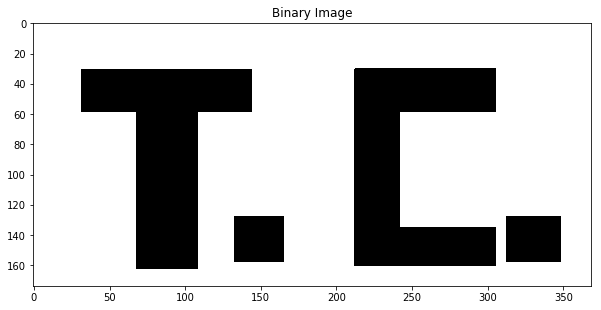

In [91]:
plt.figure(1,figsize=(10,10))
plt.title("Binary Image")
plt.imshow(bw_img,cmap='gray')
#plt.xticks([]),plt.yticks([])
plt.show()

## External Corner Pattern Matching Algorithm

In [92]:
def count_exter_corners(imblock):
    els_sum=0
    imblock = imblock.reshape(4)
    for i in range(4):
        if int(imblock[i]) == 1 :
            els_sum += 2**i
    #if s==8 or s==4 or s==2 or s==1:
    if els_sum==14 or els_sum==11 or els_sum==13 or els_sum==7:
        return True
    else:
        return False

## Internal Corner Pattern Matching Algorithm  

In [93]:
def count_inter_corners(imblock):
    els_sum=0
    imblock = imblock.reshape(4)
    for i in range(4):
        if int(imblock[i]) == 0 :
            els_sum+=2**i
    if els_sum==14 or els_sum==13 or els_sum==11 or els_sum==7:
        return True
    else:
        return False

## Counting Holes or Objects Algorithm

In [94]:
def count_holes_bin_img(bwimg):
    m=bwimg.shape[0]
    n=bwimg.shape[1]
    externals = 0
    internals = 0
    for i in range(m-1):
        for j in range(n-1):
            if(count_exter_corners(bwimg[i:i+2,j:j+2])):
                externals+=1
            if (count_inter_corners(bwimg[i:i+2,j:j+2])):
                internals+=1
                
    return int((externals - internals)/4)

In [95]:
objects = count_holes_bin_img(bw_img)
print("Binary image objects count : "+str(objects))

Binary image objects count : 4
